## Installation and import blocks

In [1]:
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install pm4py


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pm4py
import math

## Data retrieving (step 1 : Data Collection)

In [3]:
# Retrieve the original events log from the provided .xes file [warning: do not use a celeron like me!]
original_event_log = pm4py.read_xes("../Assets/Road_Traffic_Fine_Management_Process.xes")
orginal_data_frame = pm4py.convert_to_dataframe(original_event_log)
original_event_log.head()

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 150370/150370 [00:10<00:00, 14751.01it/s]


,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
0,35.0,561,NIL,Create Fine,A,0.0,complete,2006-07-24 00:00:00+00:00,157.0,0.0,A1,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-05 00:00:00+00:00,NaN,NaN,A1,11.0,NaN,NaN,NaN,NaN
2,35.0,561,NIL,Create Fine,A,0.0,complete,2006-08-02 00:00:00+00:00,157.0,0.0,A100,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-12 00:00:00+00:00,NaN,NaN,A100,11.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2007-01-15 00:00:00+00:00,NaN,NaN,A100,NaN,P,P,NaN,NaN


In [4]:
# Printing the start and end activities of the event log
start_activities = pm4py.get_start_activities(original_event_log)
end_activities = pm4py.get_end_activities(original_event_log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'Create Fine': 150370}
End activities: {'Send Fine': 20755, 'Send for Credit Collection': 58997, 'Payment': 67201, 'Send Appeal to Prefecture': 3144, 'Appeal to Judge': 134, 'Notify Result Appeal to Offender': 86, 'Receive Result Appeal from Prefecture': 53}


C:\Users\pietro\AppData\Local\Temp\ipykernel_3308\505148494.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  original_event_log.fillna("None", inplace=True)


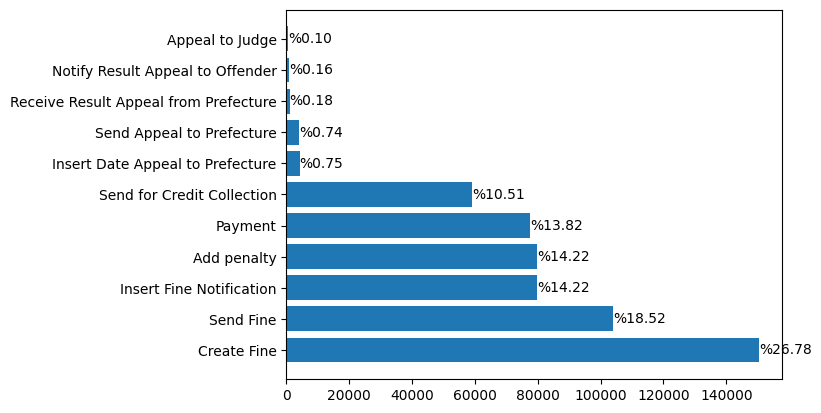

In [5]:
# Replacing the nan values with None for practice reason, not worth to remove the rows  because they are not many and the dataset will be ruined or useless
original_event_log.fillna("None", inplace=True)
activities_number = original_event_log.get("concept:name").value_counts()
bars = plt.barh(activities_number.index, activities_number.values)
plt.bar_label(bars, labels=['%' + '%.2f'%((x/original_event_log.get("concept:name").count())*100) for x in bars.datavalues])
plt.show()

## Some orginal stats:

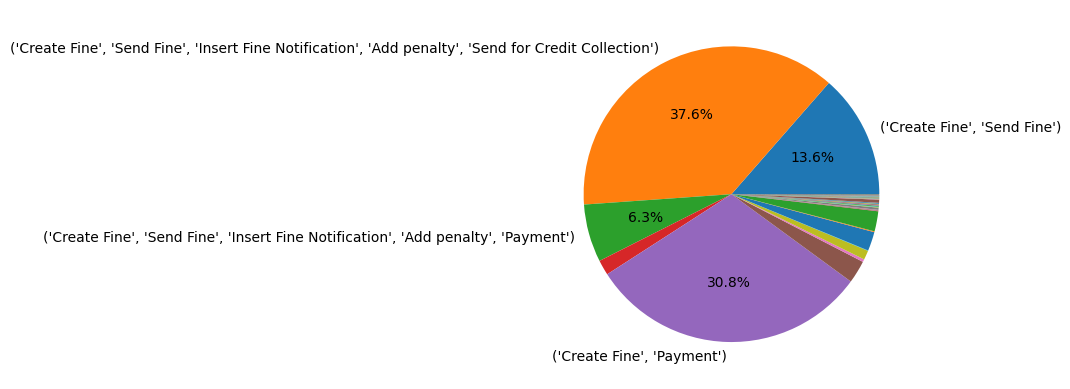

In [6]:
# Original event log stats:
original_variants = pm4py.get_variants(original_event_log)

# Convert the variants dictionary to a pandas Series\
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(original_variants.values(), labels=original_variants.keys(), autopct='%1.1f%%')

threshold = 5
for label, pct_label in zip(texts, autotexts):
    pct_value = pct_label.get_text().rstrip('%')
    if float(pct_value) < threshold:
        label.set_text('')
        pct_label.set_text('')     
plt.show()


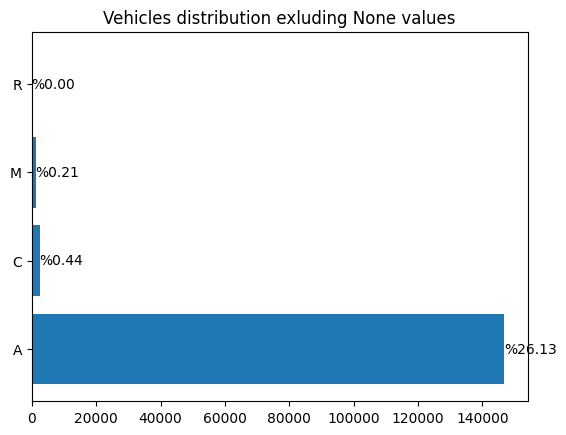

Amounts stats:
Mean 63.6816560395868 - Median 38.0 - Mode 0    35.0
Name: amount, dtype: object
Total Payments Amounts stats:
Mean 17.815603519745885 - Median 0.0 - Mode 0    0.0
Name: totalPaymentAmount, dtype: object
Articolo più utilizzato: 157.0
Articolo meno utilizzato: 159.0
Articoli totali: 66


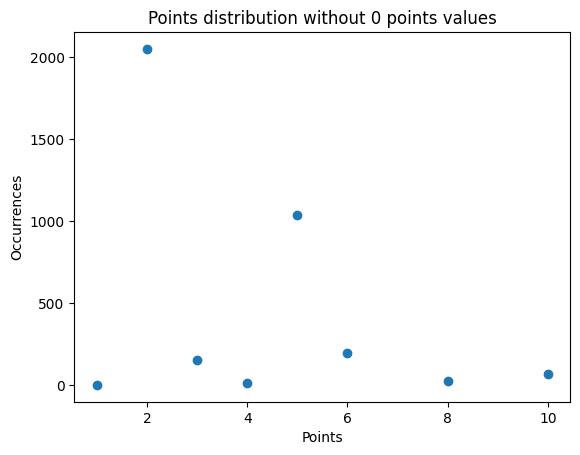

count       8.000000
mean      443.500000
std       734.432726
min         2.000000
25%        23.750000
50%       111.000000
75%       405.250000
max      2050.000000
Name: count, dtype: float64

In [54]:
vehicles_number = original_event_log["vehicleClass"][(original_event_log["vehicleClass"] != "None")].value_counts()
vehicles_number = vehicles_number.filter(items=["A", "C", "M", "R"], axis=0)

bars = plt.barh(vehicles_number.index, vehicles_number.values)
plt.bar_label(bars, labels=['%' + '%.2f'%((x/original_event_log.get("vehicleClass").count())*100) for x in bars.datavalues])
plt.title("Vehicles distribution exluding None values")
plt.show()

#points expense	
amounts = original_event_log["amount"][(original_event_log["amount"] != "None")]
print("Amounts stats:\nMean {} - Median {} - Mode {}".format(amounts.mean(), amounts.median(), amounts.mode()))

totalPaymentsAmount = original_event_log["totalPaymentAmount"][(original_event_log["totalPaymentAmount"] != "None")]
print("Total Payments Amounts stats:\nMean {} - Median {} - Mode {}".format(totalPaymentsAmount.mean(), totalPaymentsAmount.median(), totalPaymentsAmount.mode()))

# Converti la serie in una serie di stringhe
articles = original_event_log["article"][original_event_log["article"] != "None"].astype(str)
article_counts = articles.value_counts()

# Stampa le statistiche
print("Articolo più utilizzato:", article_counts.idxmax())
print("Articolo meno utilizzato:", article_counts.idxmin())
print("Articoli totali:", articles.unique().size)

points = original_event_log["points"][(original_event_log["points"] != "None")]
points = points[points != 0]
points = points.value_counts()
plt.scatter(points.index, points.values)
plt.xlabel("Points")
plt.ylabel("Occurrences")
plt.title("Points distribution without 0 points values")
plt.show()
points.describe()

# Start of Filtering step (step 2 : Data Preprocessing)

In this step we will shorten the dataset with:

1. A maximum number of activities for trace as 9 (The box plot Maximum is 9.5, even if the point n.3 will cut up even more)
2. A maximum duration of the traces of 1494,6 days (The box plot Maximum)
3. We will consider only the variants that cover at least 0.24% of the cases in the event log (we will cover ~98.6% of all of the event logs this way)
4. **bonus** We will also try to use a pattern policy for the variants consideration, maybe reduce the percentage of variants consideration, but incorporating some smaller variants in big ones 

In [8]:
# 1 Filtering for number of activities 
filtered_log = pm4py.filter_case_size(original_event_log, 1, 9)